In [151]:
column_names = [
'duration', 'protocol_type', 'service', 'flag',
'src_bytes', 'dst_bytes',
'land', 'wrong_fragment', 'urgent', 'hot',
'num_failed_logins',
'logged_in', 'num_compromised',
'root_shell', 'su_attempted',
'num_root', 'num_file_creations',
'num_shells', 'num_access_files',
'num_outbound_cmds', 'is_host_login',
'is_guest_login', 'count',
'srv_count', 'serror_rate', 'srv_serror_rate',
'rerror_rate',
'srv_rerror_rate', 'same_srv_rate',
'diff_srv_rate', 'srv_diff_host_rate',
'dst_host_count', 'dst_host_srv_count',
'dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate',
'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate', 'class', 'difficulty' ]

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load data
train_df = pd.read_csv(r'/content/extracted_data/nsl-kdd/KDDTrain+.txt', header=None, names=column_names)
train_df.drop(['difficulty'], axis=1, inplace=True)

test_df = pd.read_csv(r'/content/extracted_data/nsl-kdd/KDDTest+.txt', header=None, names=column_names)
test_df.drop(['difficulty'], axis=1, inplace=True)

# Display data
print("--- Training Data ---")
print(f"Shape: {train_df.shape}")
display(train_df.head())

print("--- Testing Data ---")
print(f"Shape: {test_df.shape}")
display(test_df.head())

--- Training Data ---
Shape: (125973, 42)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


--- Testing Data ---
Shape: (22544, 42)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan


In [153]:
print("\n--- Training Data Info ---")
train_df.info()



--- Training Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              1

In [154]:
print("\n--- Missing Values ---")
print(train_df.isnull())


--- Missing Values ---
        duration  protocol_type  service   flag  src_bytes  dst_bytes   land  \
0          False          False    False  False      False      False  False   
1          False          False    False  False      False      False  False   
2          False          False    False  False      False      False  False   
3          False          False    False  False      False      False  False   
4          False          False    False  False      False      False  False   
...          ...            ...      ...    ...        ...        ...    ...   
125968     False          False    False  False      False      False  False   
125969     False          False    False  False      False      False  False   
125970     False          False    False  False      False      False  False   
125971     False          False    False  False      False      False  False   
125972     False          False    False  False      False      False  False   

        wrong_f

In [155]:
print("\n--- Missing Values ---")
print(train_df.isnull().sum())


--- Missing Values ---
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate      

In [156]:
 print("\n--- Missing Values ---")
print(train_df.isnull().sum().sum())


--- Missing Values ---
0


In [157]:
train_df['class']

,class
0,normal
1,normal
2,neptune
3,normal
4,normal
...,...
125968,neptune
125969,normal
125970,normal
125971,neptune


In [158]:
train_df['class'].value_counts()

,count
class,
normal,67343
neptune,41214
satan,3633
ipsweep,3599
portsweep,2931
smurf,2646
nmap,1493
back,956
teardrop,892


In [159]:
train_df['class'].count()

np.int64(125973)

/tmp/ipython-input-3158621093.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='attack_binary',data=train_df, palette='pastel')


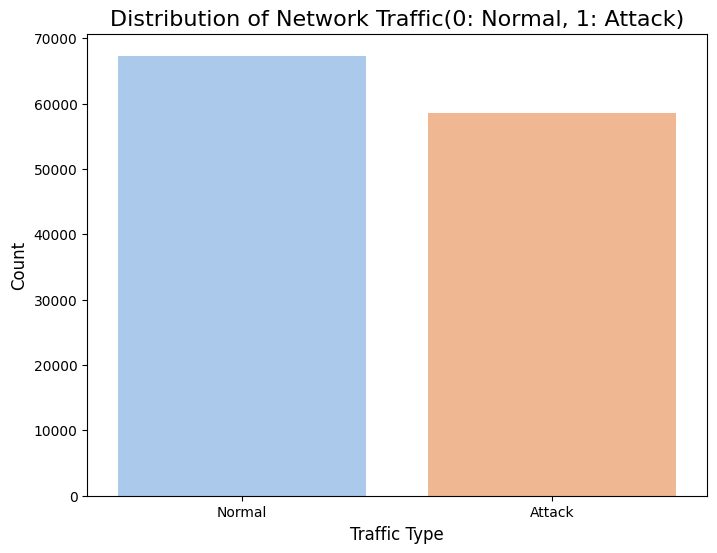

attack_binary
0    0.534583
1    0.465417
Name: proportion, dtype: float64


In [160]:
train_df['attack_binary'] = train_df['class'].apply(lambda x: 0 if x == 'normal' else 1)
test_df['attack_binary'] = test_df['class'].apply(lambda x: 0 if x == 'normal' else 1)

plt.figure(figsize=(8,6))
sns.countplot(x='attack_binary',data=train_df, palette='pastel')
plt.title('Distribution of Network Traffic(0: Normal, 1: Attack)', fontsize=16)
plt.xlabel('Traffic Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0,1],['Normal','Attack'])
plt.show()
print(train_df['attack_binary'].value_counts(normalize=True))